# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

<b>Цель проекта</b>

Провести анализ на основе данных, предоставленных компанией, и ответить на следующие вопросы
<div>

* сколько стоит привлечение пользователей из различных рекламных каналов;

* сколько денег приносит каждый клиент,

* когда расходы на привлечение клиента окупаются,)

* какие факторы мешают привлечению клиентов.
</div>

<b>Описание данных<b/>

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, три датасета. Файл <code>visits_info_short.csv</code> хранит лог сервера с информацией о посещениях сайта, <code>orders_info_short.csv</code> — информацию о заказах, а <code>costs_info_short.csv</code> — информацию о расходах на рекламу.

Структура <code>visits_info_short.csv</code>:


<div>

* <code>User Id</code> — уникальный идентификатор пользователя,

* <code>Region</code> — страна пользователя,

* <code>Device</code> — тип устройства пользователя,

* <code>Channel</code> — идентификатор источника перехода,
    
* <code>Session Start</code> — дата и время начала сессии,
    
* <code>Session End</code> — дата и время окончания сессии.   
    
</div>

Структура <code>orders_info_short.csv</code>:


<div>

* <code>User Id</code> — уникальный идентификатор пользователя,

* <code>Event Dt</code> — дата и время покупки,

* <code>Revenue </code> — сумма заказа.   
    
</div>

Структура <code>costs_info_short.csv</code>:


<div>

* <code>dt</code> —  дата проведения рекламной кампании,

* <code>Channel</code> — идентификатор рекламного источника,

* <code>costs</code> — расходы на эту кампанию.   
    
</div>

<b>План работы</b>

Исследование пройдет в шесть этапов:

<div>

* Обзор и предобработка данных

* Написание функций для расчёта и анализа LTV, ROI, удержания и конверсии

* Исследовательский анализ данных

* Анализ маркетинга
    
* Оценка окупаемости рекламы
    
* Общий вывод и рекомендации для отдела маркетинга   
    
</div>

### Загрузим данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [3]:
#Импорт небходимых библиотек и чтение файлов
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [4]:
#Загрузка данных
try:
  visits, orders, costs = (
      pd.read_csv('/datasets/visits_info_short.csv'), #визиты
      pd.read_csv('/datasets/orders_info_short.csv'), #заказы
      pd.read_csv('/datasets/costs_info_short.csv') #траты на рекламу
  )
except:
  visits, orders, costs = (
      pd.read_csv('visits_info_short.csv'), #визиты
      pd.read_csv('orders_info_short.csv'), #заказы
      pd.read_csv('costs_info_short.csv') #траты на рекламу
  )    

<b>Посмотрим на каждый датасет и выполним предобработку</b>

Датасет с визитами

In [5]:
#Общая информация
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [7]:
#Проверка на наличие дубликатов
visits.duplicated().sum()

0

In [8]:
#Приведем названия столбцов к нижнему регистру
visits = visits.rename(columns={
    'User Id': 'user_id', 
    'Region': 'region', 
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end'
})
#Преобразование типов данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Датасет с заказами

In [9]:
#Общая информация
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
#Проверка на наличие дубликатов
orders.duplicated().sum()

0

In [12]:
#Приведем названия столбцов к нижнему регистру
orders = orders.rename(columns={
    'User Id': 'user_id', 
    'Event Dt': 'event_dt',
    'Revenue': 'revenue'
})
#Преобразование типов данных
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Датасет с затратами на рекламу

In [13]:
#Общая информация
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [15]:
#Проверка на наличие дубликатов
costs.duplicated().sum()

0

In [16]:
#Приведем названия столбцов к нижнему регистру
costs = costs.rename(columns={
    'Channel': 'channel'
})
#Преобразование типов данных
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Предобработка данных завершена. Пропусков и дубликатов необнаружено. Названия столбцов приведены к нижнему регистру, типы данных преобразованы и соответствуют сохраненным в них значениям

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии, а также функции для построения графиков:

In [17]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [18]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [19]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [21]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [22]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [23]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [24]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функции заданы, можно переходить к исследовательскому анализу данных

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей

In [25]:
#Получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-09 17:29:23,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-16 11:56:00,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-30 03:46:29,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-11 19:18:43,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-11 21:13:47,False,0.250435


Согласно заданию, анализ необходимо провести по состоянию на 1 ноября 2019 года, но т.к. наша выгрузка содержит данные по 27 октября 2019, возьмем эту дату.
Так же, в бизнес-плане заложено, что пользователи должны окупаться не позднее, чем через две недели после привлечения.

In [26]:
observation_date = profiles['dt'].max()  # момент анализа
analysis_horizon = 14  # горизонт анализа

# считаем минимальную привлечения
min_analysis_date = profiles['dt'].min()

# считаем максимальную дату привлечения
max_analysis_date = profiles['dt'].max() 

print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


<b>Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

In [27]:
region =  (profiles
           .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

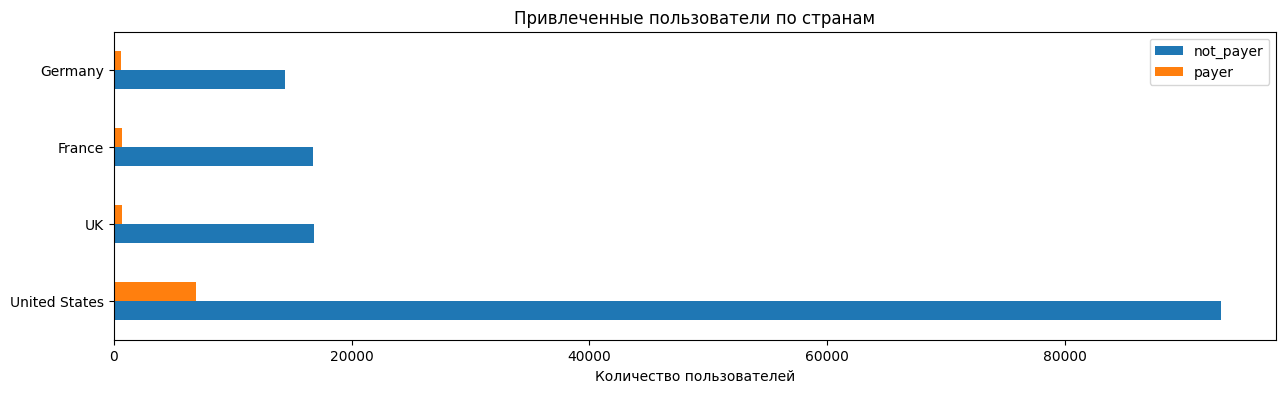

In [28]:
region.plot(kind='barh', figsize = (15,4))

plt.title('Привлеченные пользователи по странам')
plt.legend(title='')
plt.xlabel('Количество пользователей')
plt.ylabel('')
plt.show()

In [29]:
region['payer_share'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)
region

payer,not_payer,payer,payer_share
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


США - очевидный лидер по привлеченным пользователям, а также по количеству платящих пользователей. Характеристики пользователей из Франции и Великобритании очень похожи. Меньше всего привлеченных пользователей из Германии, однако по доле платящих пользователей она на втором месте

<b>Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи

In [30]:
device =  (profiles
           .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

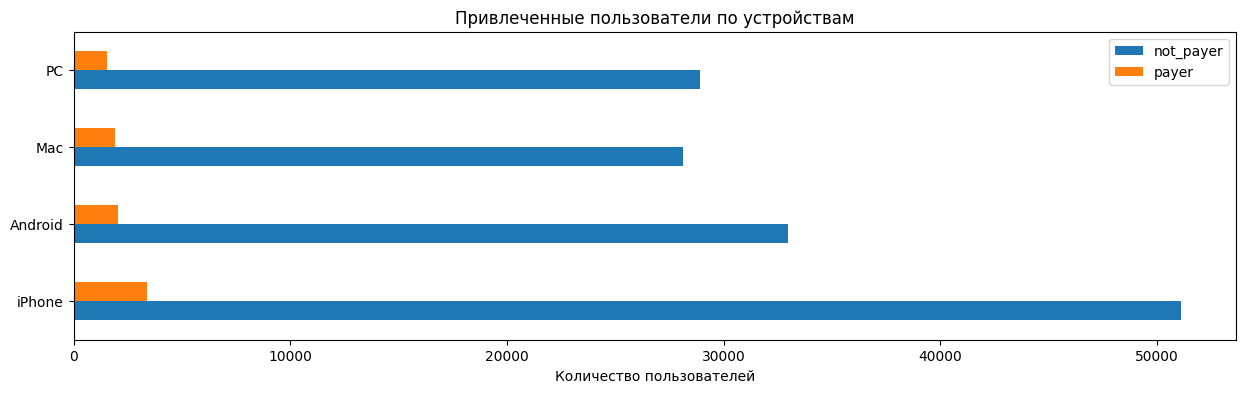

In [31]:
device.plot(kind='barh', figsize = (15,4))

plt.title('Привлеченные пользователи по устройствам')
plt.legend(title='')
plt.xlabel('Количество пользователей')
plt.ylabel('')
plt.show()

In [32]:
device['payer_share'] = (device.payer / (device.not_payer + device.payer) * 100).round(2)
device

payer,not_payer,payer,payer_share
device,,,
iPhone,51097,3382,6.21
Android,32982,2050,5.85
Mac,28130,1912,6.36
PC,28918,1537,5.05


Больше всего пользователей, как платящих, так и не платящих, используют iPhone. Доля платящих пользователей выше всего у пользователей Mac

<b>Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей

In [33]:
channel =  (profiles
           .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )

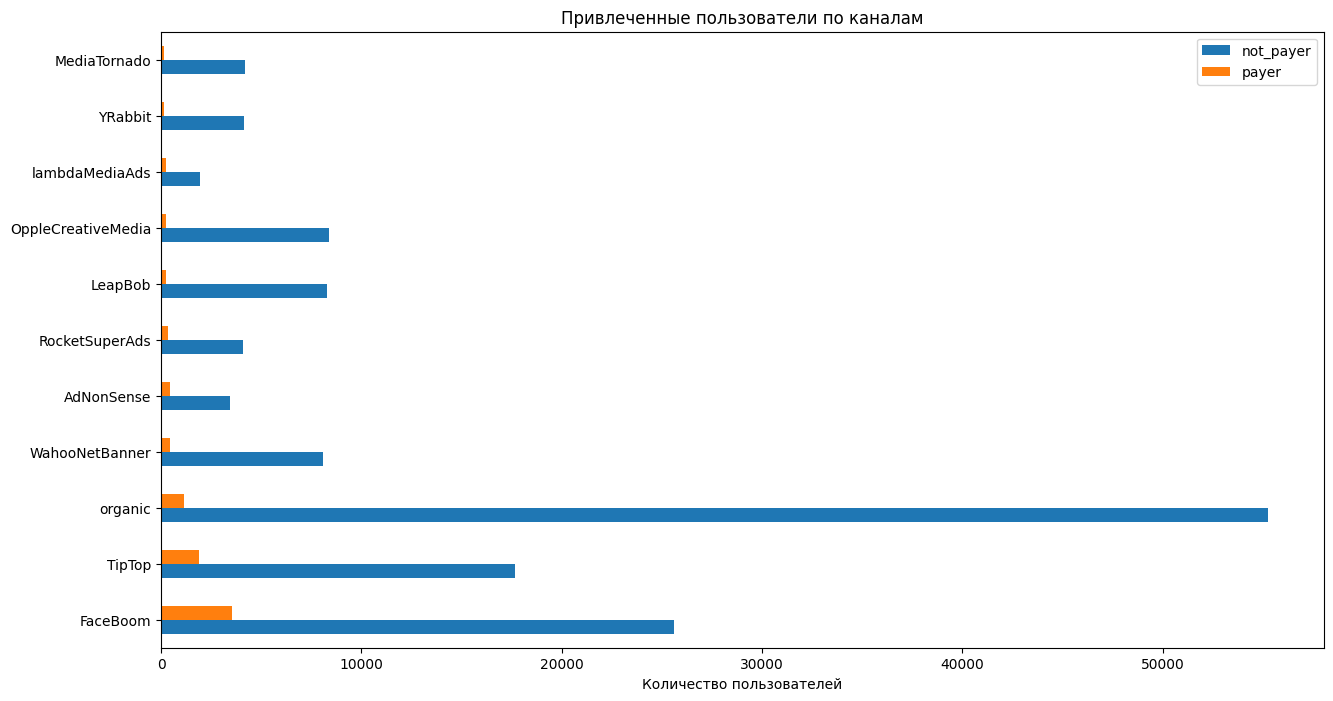

In [34]:
channel.plot(kind='barh', figsize = (15,8))

plt.title('Привлеченные пользователи по каналам')
plt.legend(title='')
plt.xlabel('Количество пользователей')
plt.ylabel('')
plt.show()

In [35]:
channel['payer_share'] = (channel.payer / (channel.not_payer + channel.payer) * 100).round(2)                           
channel.sort_values(by='payer_share', ascending = False)

payer,not_payer,payer,payer_share
channel,,,
FaceBoom,25587,3557,12.20
AdNonSense,3440,440,11.34
lambdaMediaAds,1924,225,10.47
TipTop,17683,1878,9.60
RocketSuperAds,4096,352,7.91
WahooNetBanner,8100,453,5.30
YRabbit,4147,165,3.83
MediaTornado,4208,156,3.57
LeapBob,8291,262,3.06


Больше всего платящих пользователей пришло из канала FaceBoom, на втором месте - TipTop. Стоит отметить высокую долю платящих пользователей из канала AdNonSense. Очень много пользователей из органического трафика, но доля платящих из них самая маленькая.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [36]:
#Общая сумма расходоов на маркетинг
print(f'Общая сумма затрат на рекламу: {costs.costs.sum().round()}')

Общая сумма затрат на рекламу: 105497.0


In [37]:
#Распределение трат по рекламным источникам
costs_on_channel_spread = pd.DataFrame()
costs_on_channel_spread['costs'] = costs.groupby('channel')['costs'].sum()
costs_on_channel_spread['share'] = ((costs_on_channel_spread['costs'] / costs['costs'].sum()) * 100)
costs_on_channel_spread.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,costs,share
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Большая часть рекламных расходов приходится на канал TipTop (51.9%), за ним следует FaceBoom (30.75%). На следующие за ними каналы, такие как WahooNetBanner (4.88%), AdNonSense (3.71%), и OppleCreativeMedia (2.04%), тратится гораздно меньше. Расходы на прочие источники составляют 1-2% от общего бюджета.

<b>Построим визуализацию динамики изменения расходов во времени по каждому источнику. 

In [38]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.set_index('dt', inplace=True)

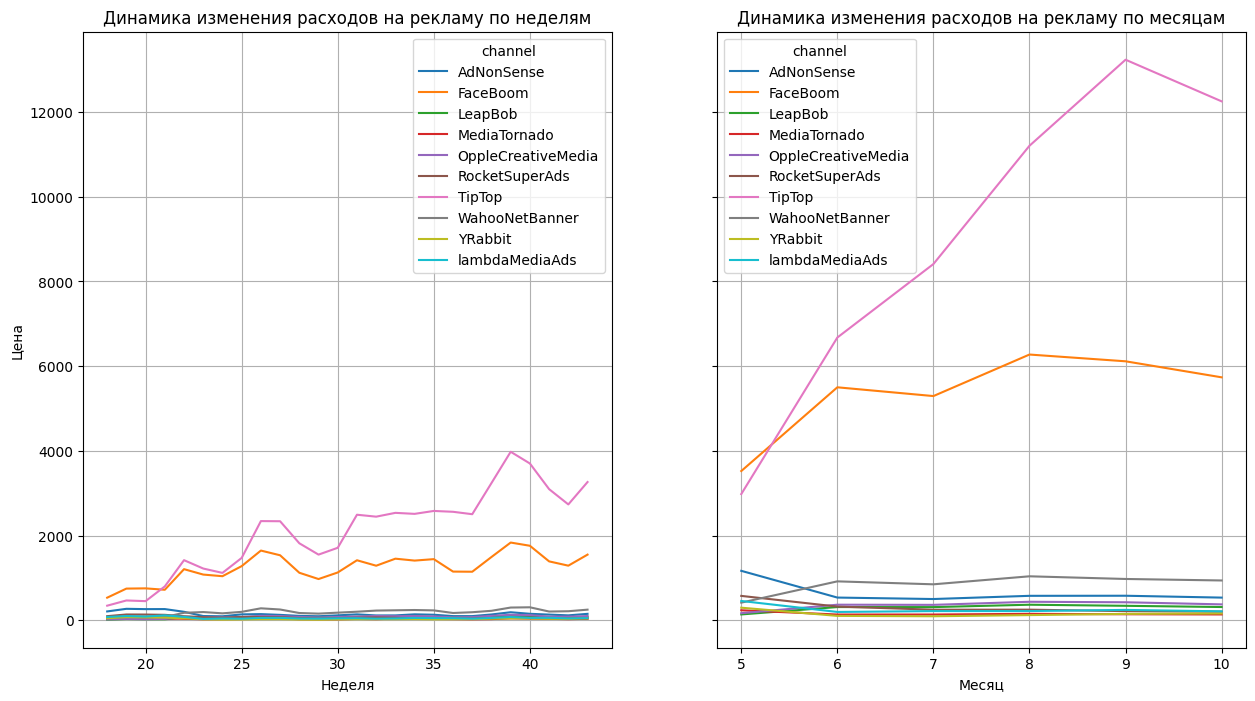

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15,8), sharey=True)

# строим график динамики изменения расходов на рекламу по неделям
costs.pivot_table(
    index=costs.index.isocalendar().week,
    values='costs',
    aggfunc='sum',
    columns='channel'
).plot(ax=axs[0], kind='line', grid=True)

axs[0].set_title('Динамика изменения расходов на рекламу по неделям')
axs[0].set_xlabel('Неделя')
axs[0].set_ylabel('Цена')

# строим график динамики изменения расходов на рекламу по месяцам
costs.pivot_table(
    index=costs.index.month,
    values='costs',
    aggfunc='sum',
    columns='channel'
).plot(ax=axs[1], kind='line', grid=True)

axs[1].set_title('Динамика изменения расходов на рекламу по месяцам')
axs[1].set_xlabel('Месяц')
axs[1].set_ylabel('') 

plt.show()



На графиках с изменением расходов на рекламу по неделям и месяцам у нас два очивидных лидера - TipTop и FaceBoom. Больше всего трафика покупали у TipTop, затраты на которой постепенно увеличивались от месяца к месяцу. Траты на FaceBoom с 5 по 6 месяц росли, затем варьировались в районе примерно 5600 - 6200 у.е. Стоимость трафика из AdNonSense с 5 по 6 месяц постепенно снижалась, а с 6 по 10 месяц находилась примерно на одном уровне. Стоимость трафика из WahooNetBanner с 5 по 6 месяц возросла, а затем оставалась приблизительно на удном уровне. На остальные трафики траты были значительно меньше.

<b>Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

In [40]:
#Не будем включать органических пользователей, так как их привлечение ничего не стоит для компании
#Средняя стоимость привлечения одного пользователя
cac_person = (profiles
              .query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .drop_duplicates()
              .agg({'acquisition_cost': 'mean'})
             )
cac_person

acquisition_cost    1.127481
dtype: float64

In [41]:
#Средний САС по источникам трафика
cac_channel = (profiles
       .pivot_table(index = 'channel',
                    values = 'acquisition_cost',
                    aggfunc='mean')
       .sort_values(by='acquisition_cost', ascending=False)
       .rename(columns={'acquisition_cost': 'cac'})
      )
cac_channel

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Исходя из полученных данных, больше всего стоит привлечение пользователя по каналу TipTop

<b>Промежуточные выводы


<div>

* Посчитали общую сумму расходов на маркетинг. Она составила 105497 у.е.

* Выяснили, как траты распределены по рекламным источникам. Больше всего тратили на TipTop - 54751.30 у.е. и FaceBoom 32445.60 у.е.

* Визуилизировали динамику изменения расходов во времени по каждому источнику. Больше всего трафика покупали у TipTop, затраты на которой постепенно увеличивались от месяца к месяцу. Траты на FaceBoom по всем месяцам находились в районе 200 у.е. На остальные трафики траты были сравнительно меньше. Из них можно отметить каналы AdNonSense и WahooNetBanner. Стоимость трафика из WahooNetBanner наоборот росла. Со значения 11 у.е. в начале мая, траты увеличивались до значений в 54 у.е. в начале октября. Траты по остальным источникам варьировались от 3 до 20 у.е. за рассматриваемый период

* В среднем, привлечение одного пользователя стоило 1.127481 у.е.. Больше всего стоит привлечение пользователя по каналу TipTop (2.799003 у.е.)
          
</div>

### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

<b>Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Исключим из набора данных всех органических пользователей

In [42]:
profiles = profiles.query('channel != "organic"')

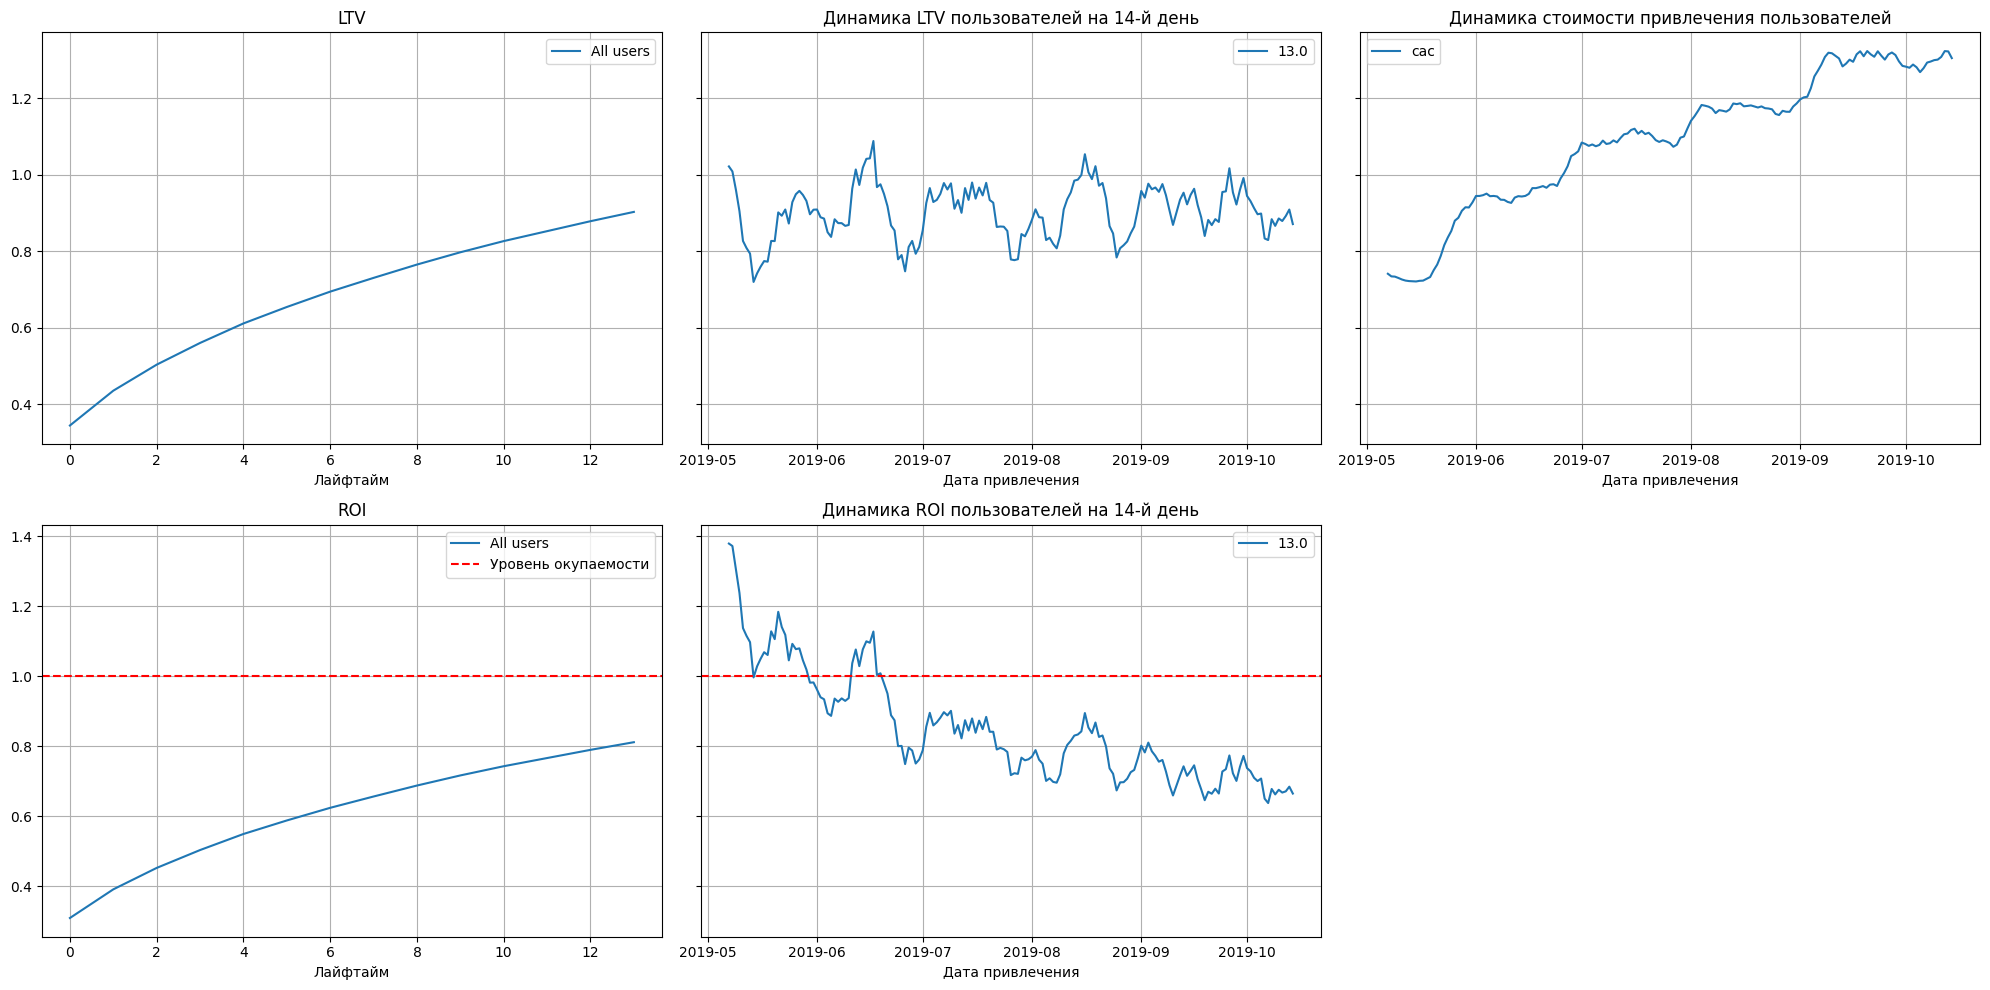

In [43]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

По полученным графикам можно сделать следующие выводы:
<div>

* К концу второй недели и далее реклама не окупается

* САС не стабилен. С течением времени он растет, значит рекламный бюджет увеличивается

* На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей

* До июля показатель был выше уровня окупаемости, но после стал падать до 0.6. Что-то идет не так: привлеченные клиенты перестают окупаться в двух-недельном лайфтайме.
          
</div>

<b>Проверим конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Сделаем разбивку по устройствам, странам, и каналам привлечения

Конверсия и удержание с разбивкой по устройствам

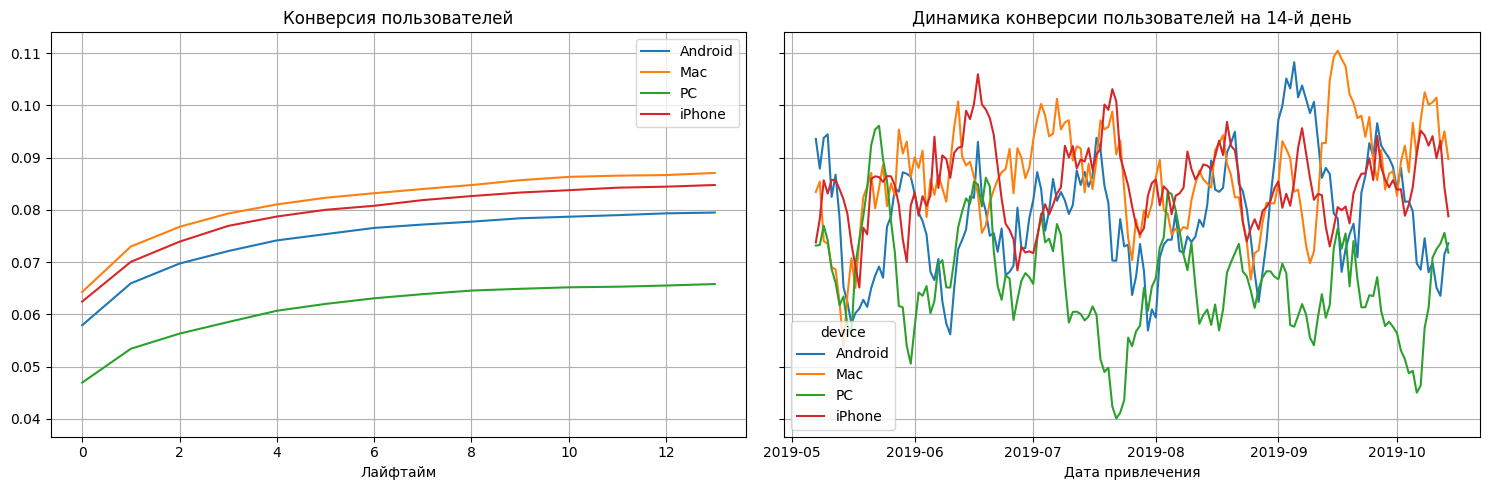

In [44]:
# конверсия с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Конверсия по устройствам достаточно хорошая. На первам местах конверсия по устройствам от Apple (iPhone и Mac), а хуже всего привлоекаются пользователи PC.

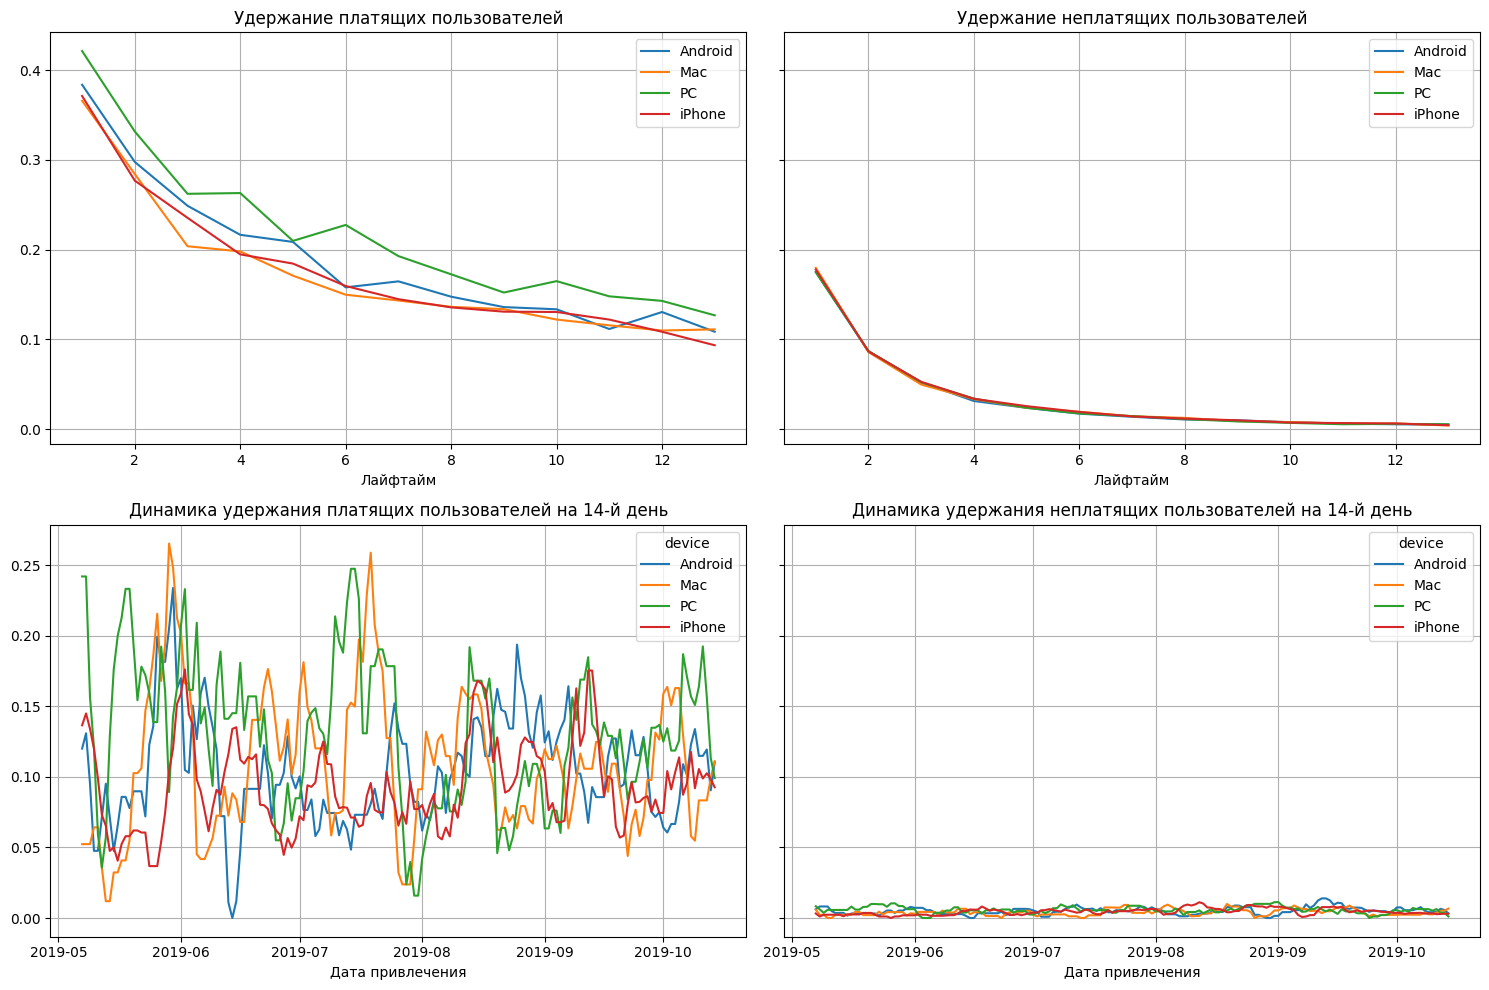

In [45]:
# удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

В целом, удержание пользователей на всех устройствах схожее и не сильно отличатется в зависимости от устройства. Платящие пользователи PC удерживаются немного лучше. 

Конверсия и удержание с разбивкой по странам

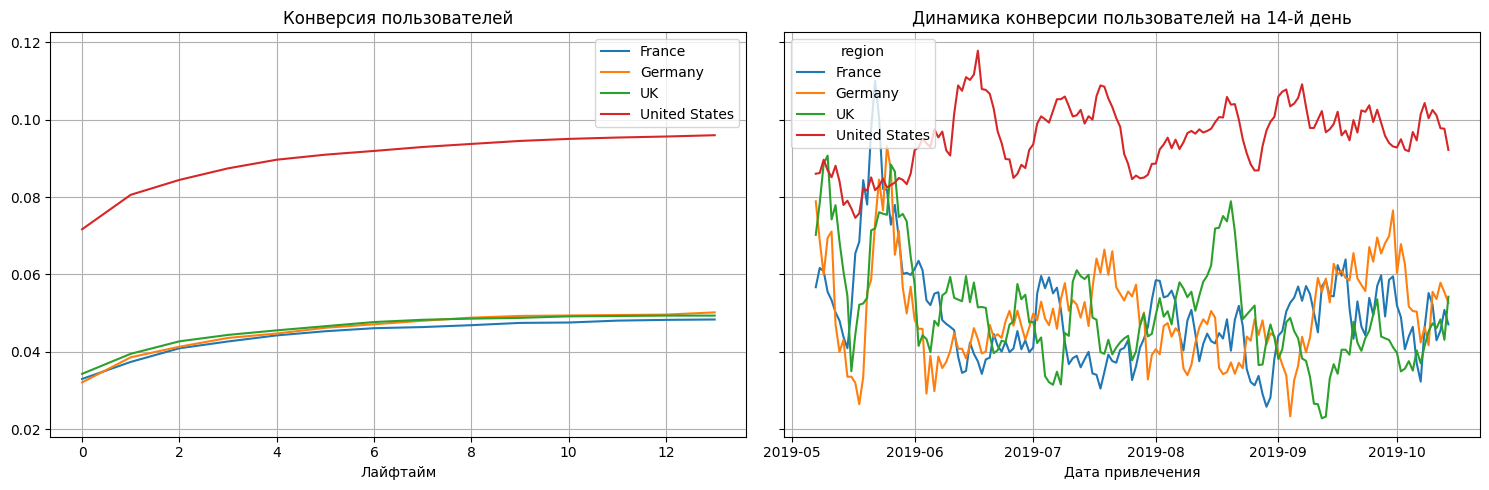

In [46]:
# конверсия с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

У пользователей из США показатель конверсии в два раза больше по сравнению с другими странами

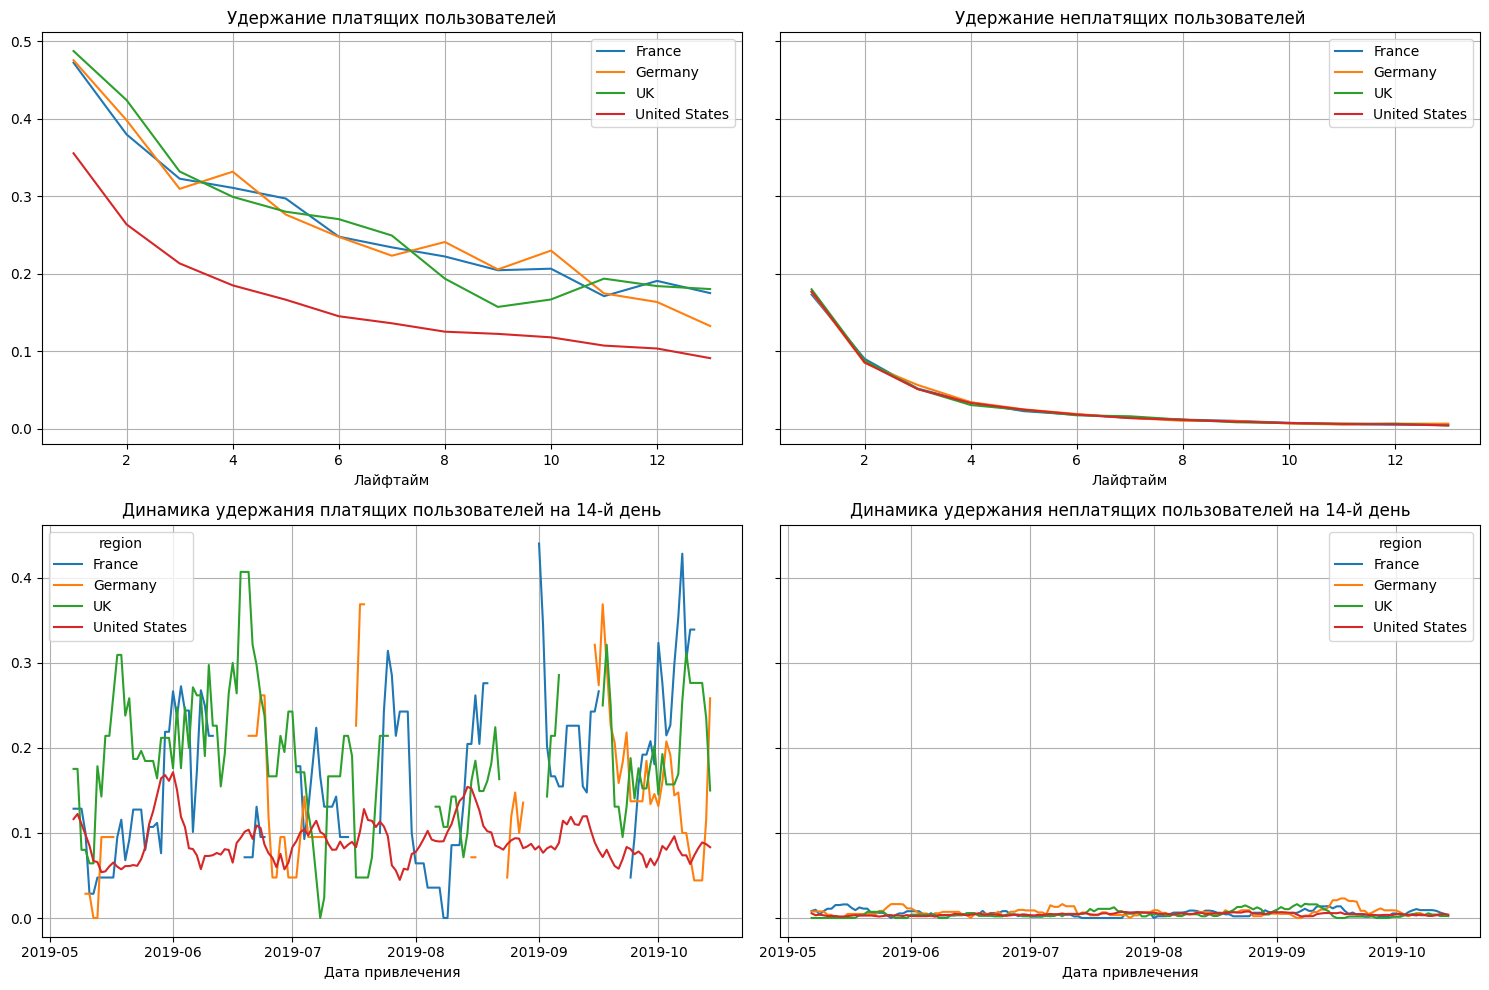

In [47]:
# удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Удержание платящих пользователей из США хуже всех прочих, интересно. Удержание неплатящих пользователей примерно такое же, как и в разбивке по устройствам

Конверсия и удержание с разбивкой по каналам привлечения

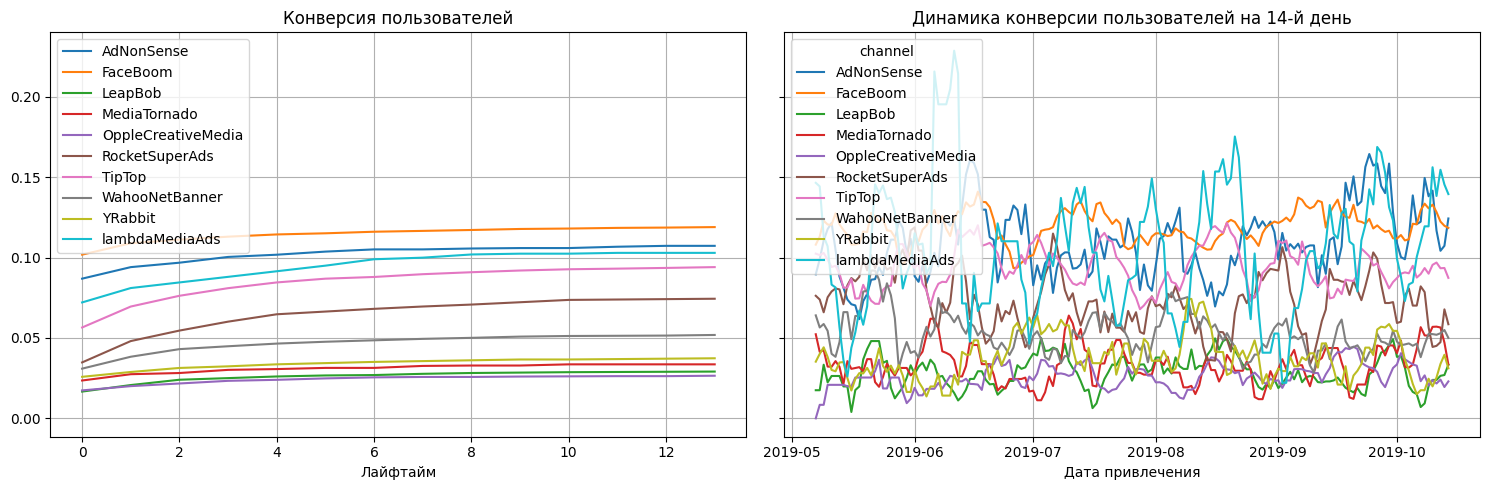

In [48]:
# конверсиz с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Пользователи, привлеченные через FaceBoom, имеют самый высокий уровень конверсии. Однако, в целом, у всех пользователей практически нет изменения динамики в течение двухнедельного периода использования.

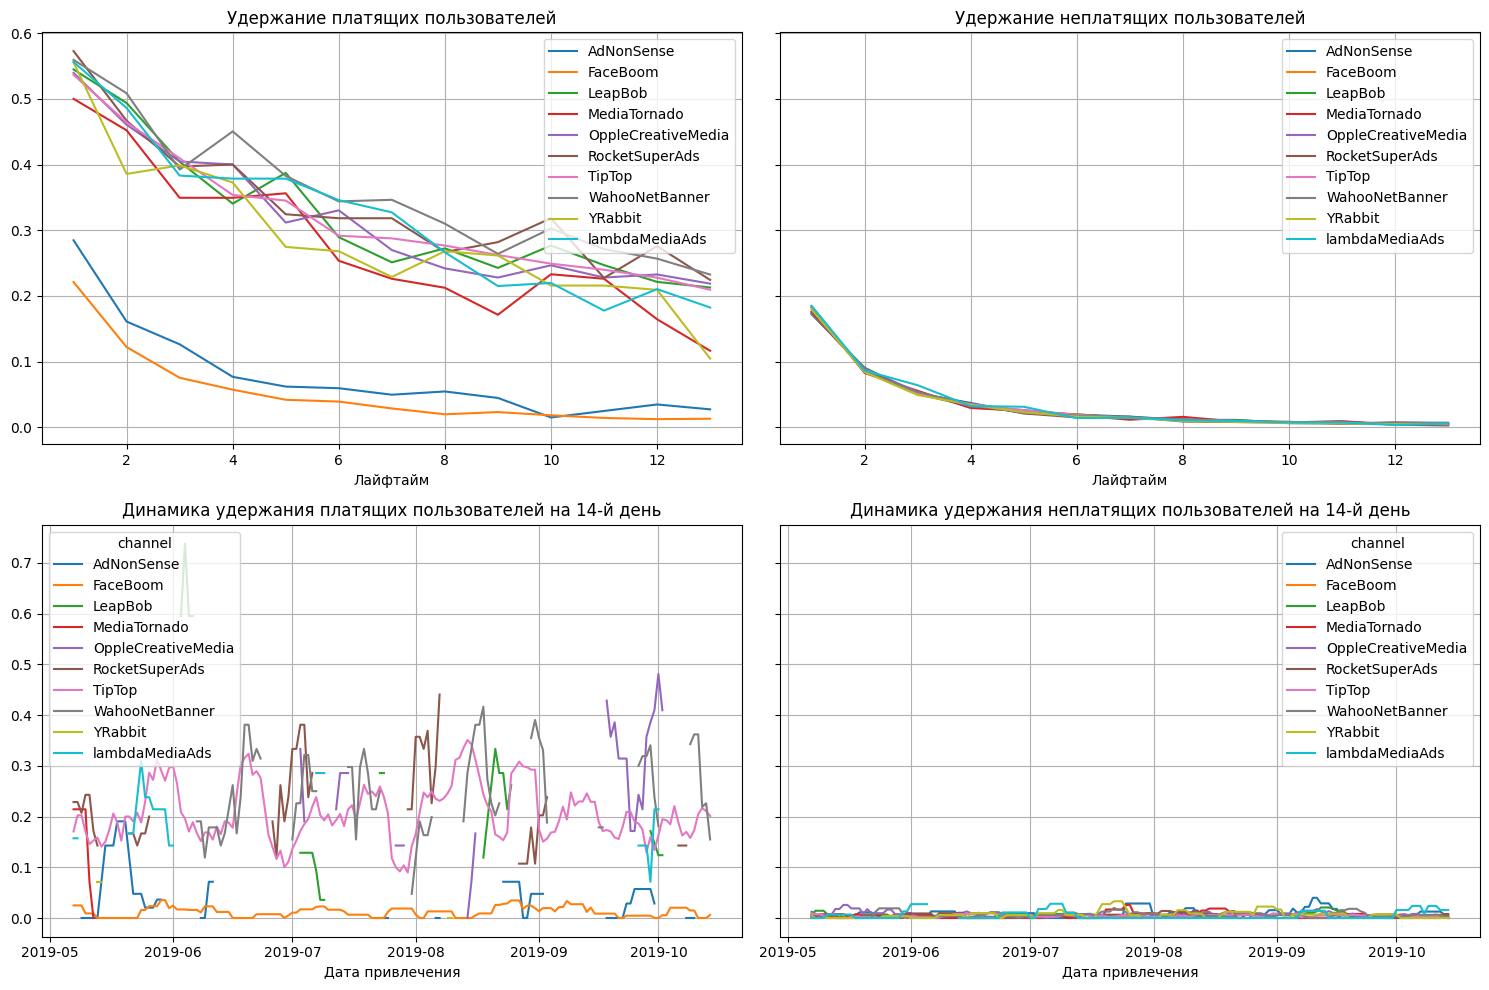

In [49]:
# удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Из платящих пользователей заметно хуже остальным удерживаются, кто пришел через FaceBoom и AdNonSense.

<b>Проанализируем окупаемость рекламы с разбивкой по устройствам

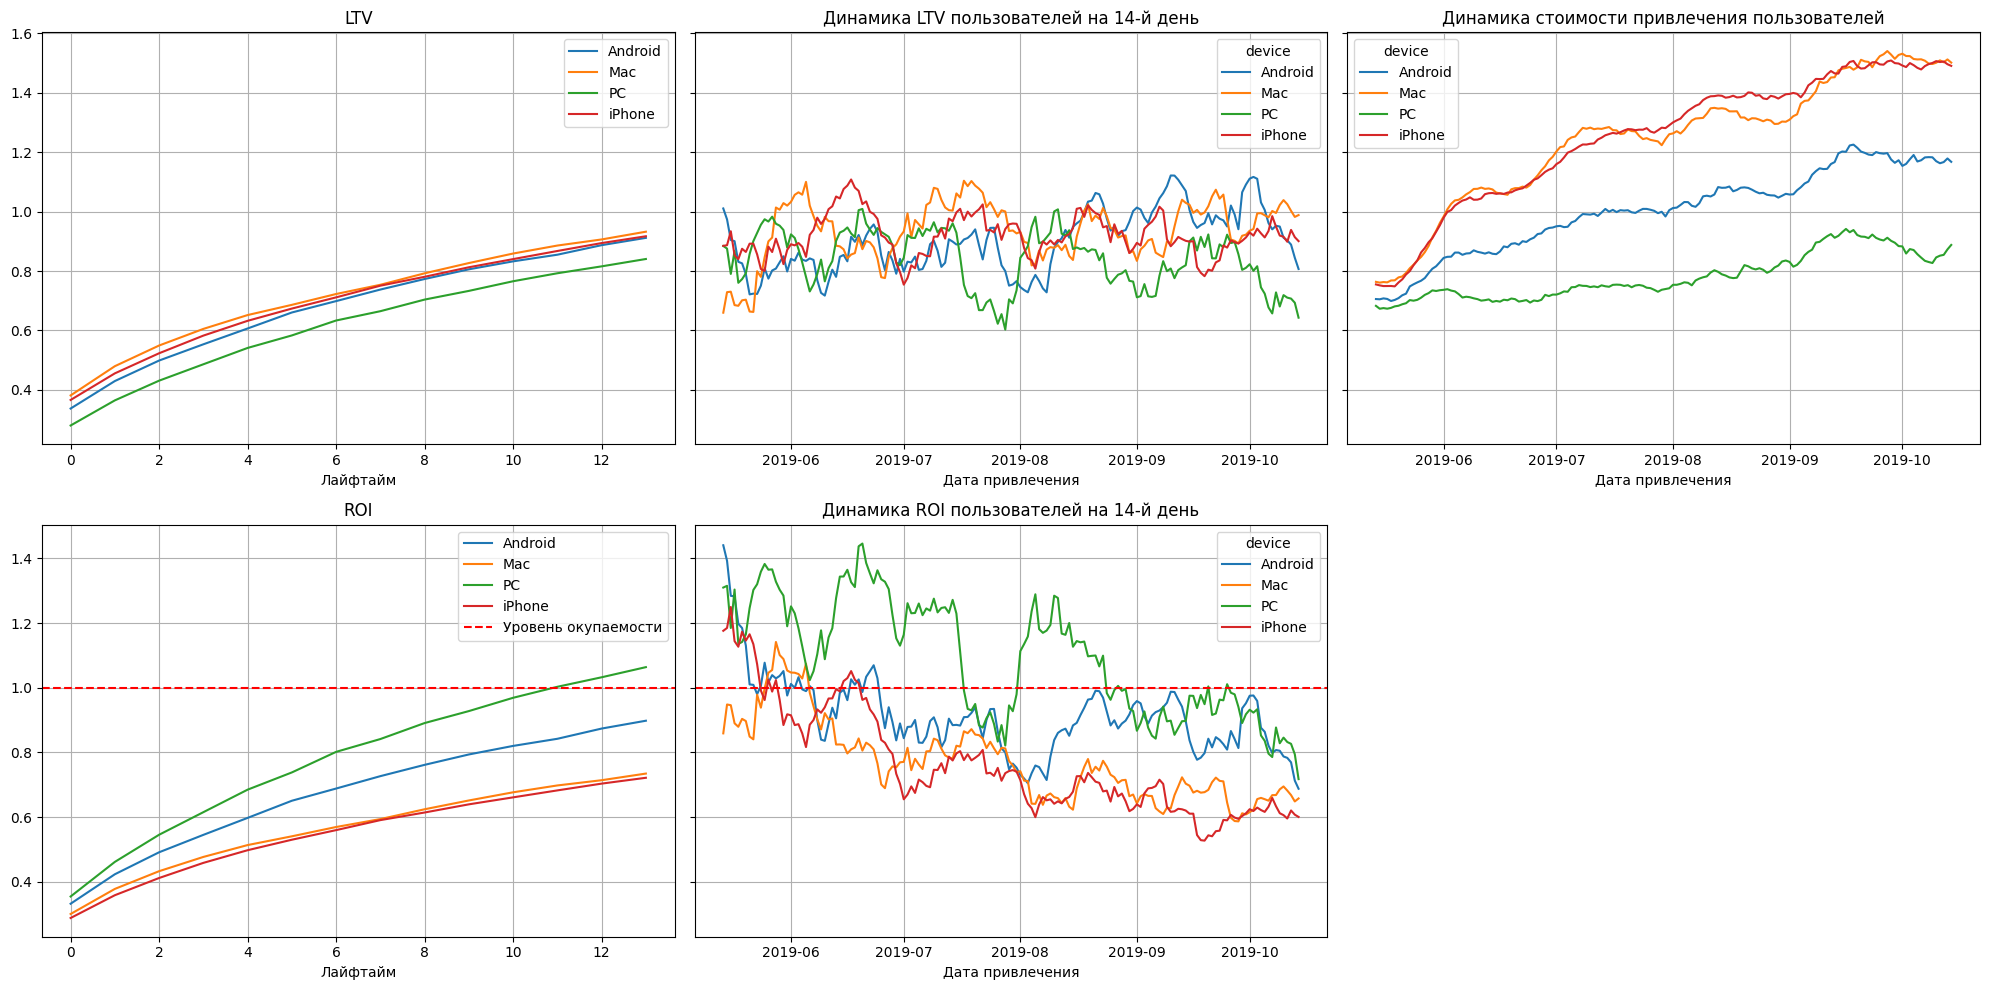

In [50]:
# окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
) 

До июня все пользователи окупались, независимо от устройства, но после этого начали возникать проблемы, особенно у владельцев Mac и iPhone. К сентябрю (и некоторое время в августе) ROI пользователей PC на 14-й день был приблизительно на уровне окупаемости, в то время как ROI всех других устройств был уже ниже уровня, достигнутого в июне. В то же время, LTV пользователей продолжал подвергаться сезонным колебаниям, но оставался стабильным. Стоимость привлечения пользователей PC оставалась на самом низком уровне, в то время как ROI был выше, чем у других устройств. В целом, можно сделать вывод, что стоимость привлечения пользователей всех устройств росла в рассматриваемый период.

Важно обратить внимание на владельцев Mac и iPhone, так как стоимость привлечения этих пользователей высока (и продолжает расти от месяца к месяцу), а окупаемость у них страдает.

<b>Проанализируем окупаемость рекламы с разбивкой по странам

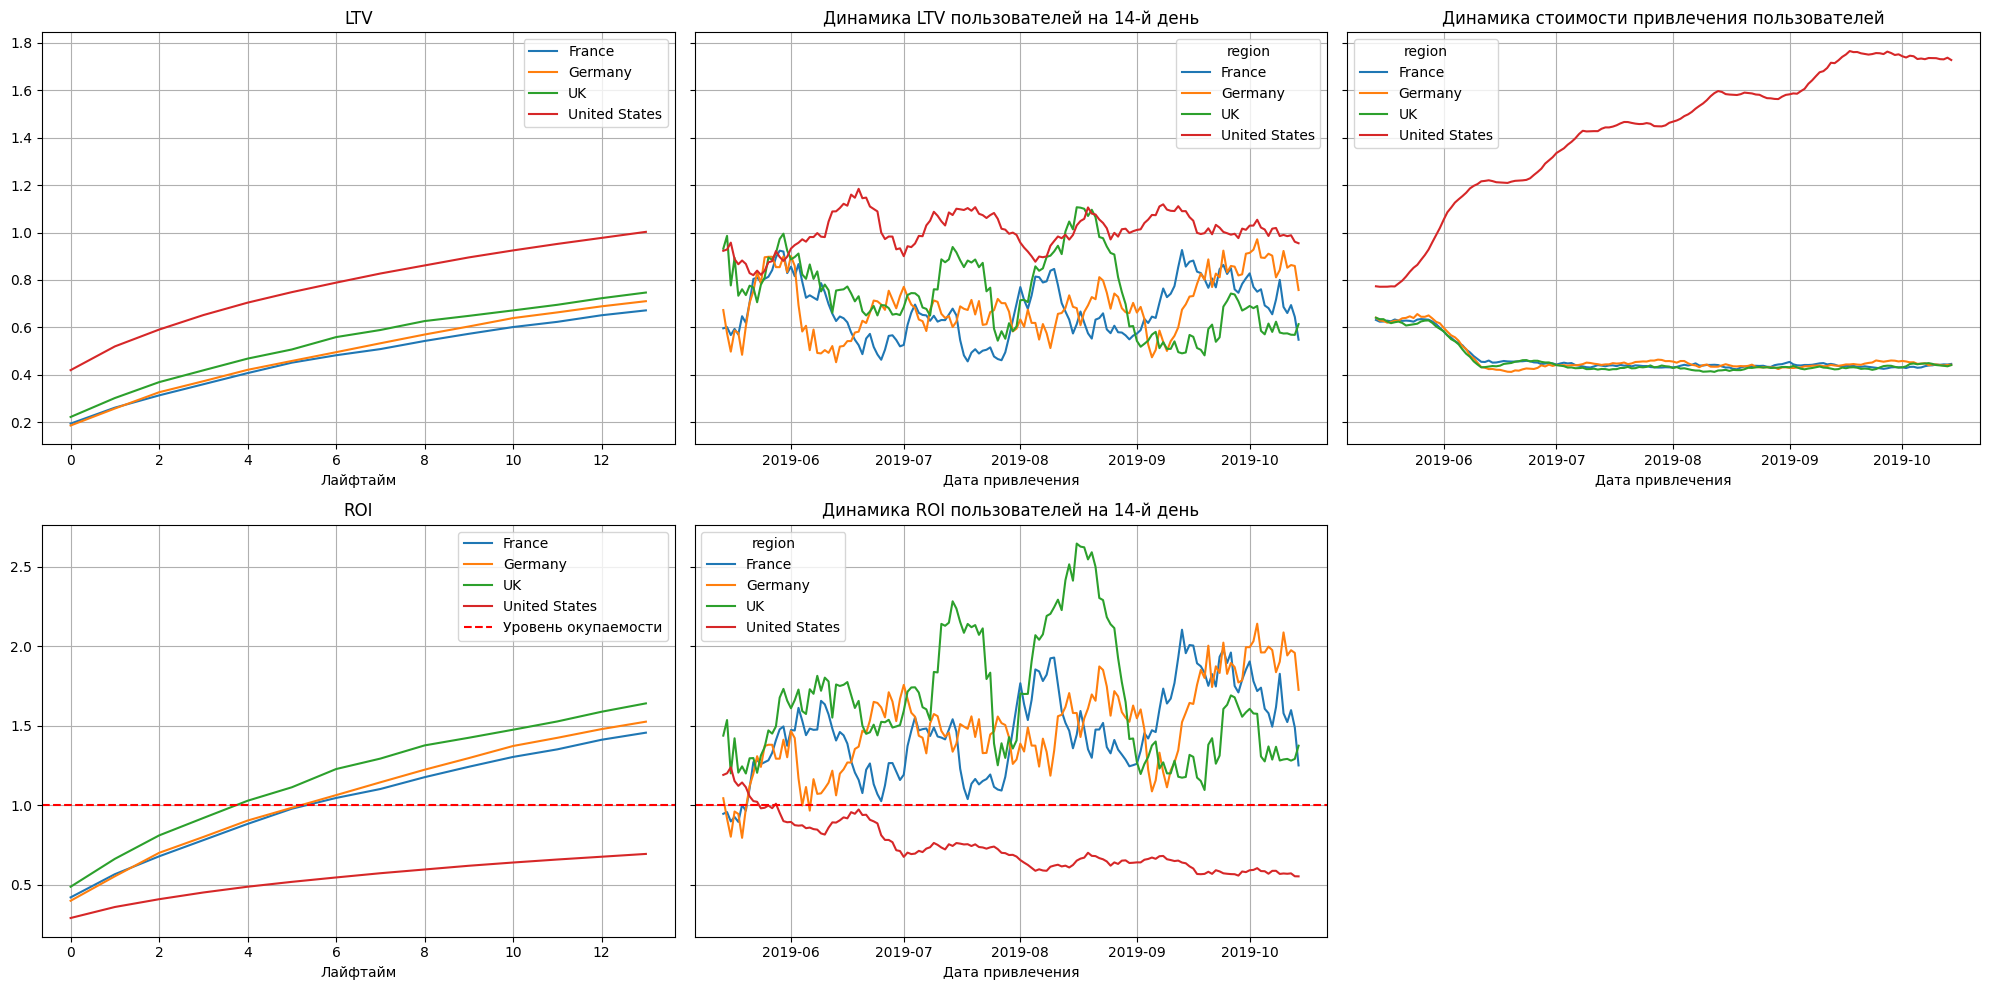

In [51]:
#окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Из полученных графиков видим, что несмотря на большое количество пользователей из США, они не окупаются, так как приходят и уходят быстро.

Затраты на рекламу в Европе остаются стабильными и окупаются, но в США эти затраты растут и перестали окупаться с июня. Лучше всего окупается Англия и Германия, а явный аутсайдер - США.

<b>Проанализируем окупаемость рекламы с разбивкой по каналам

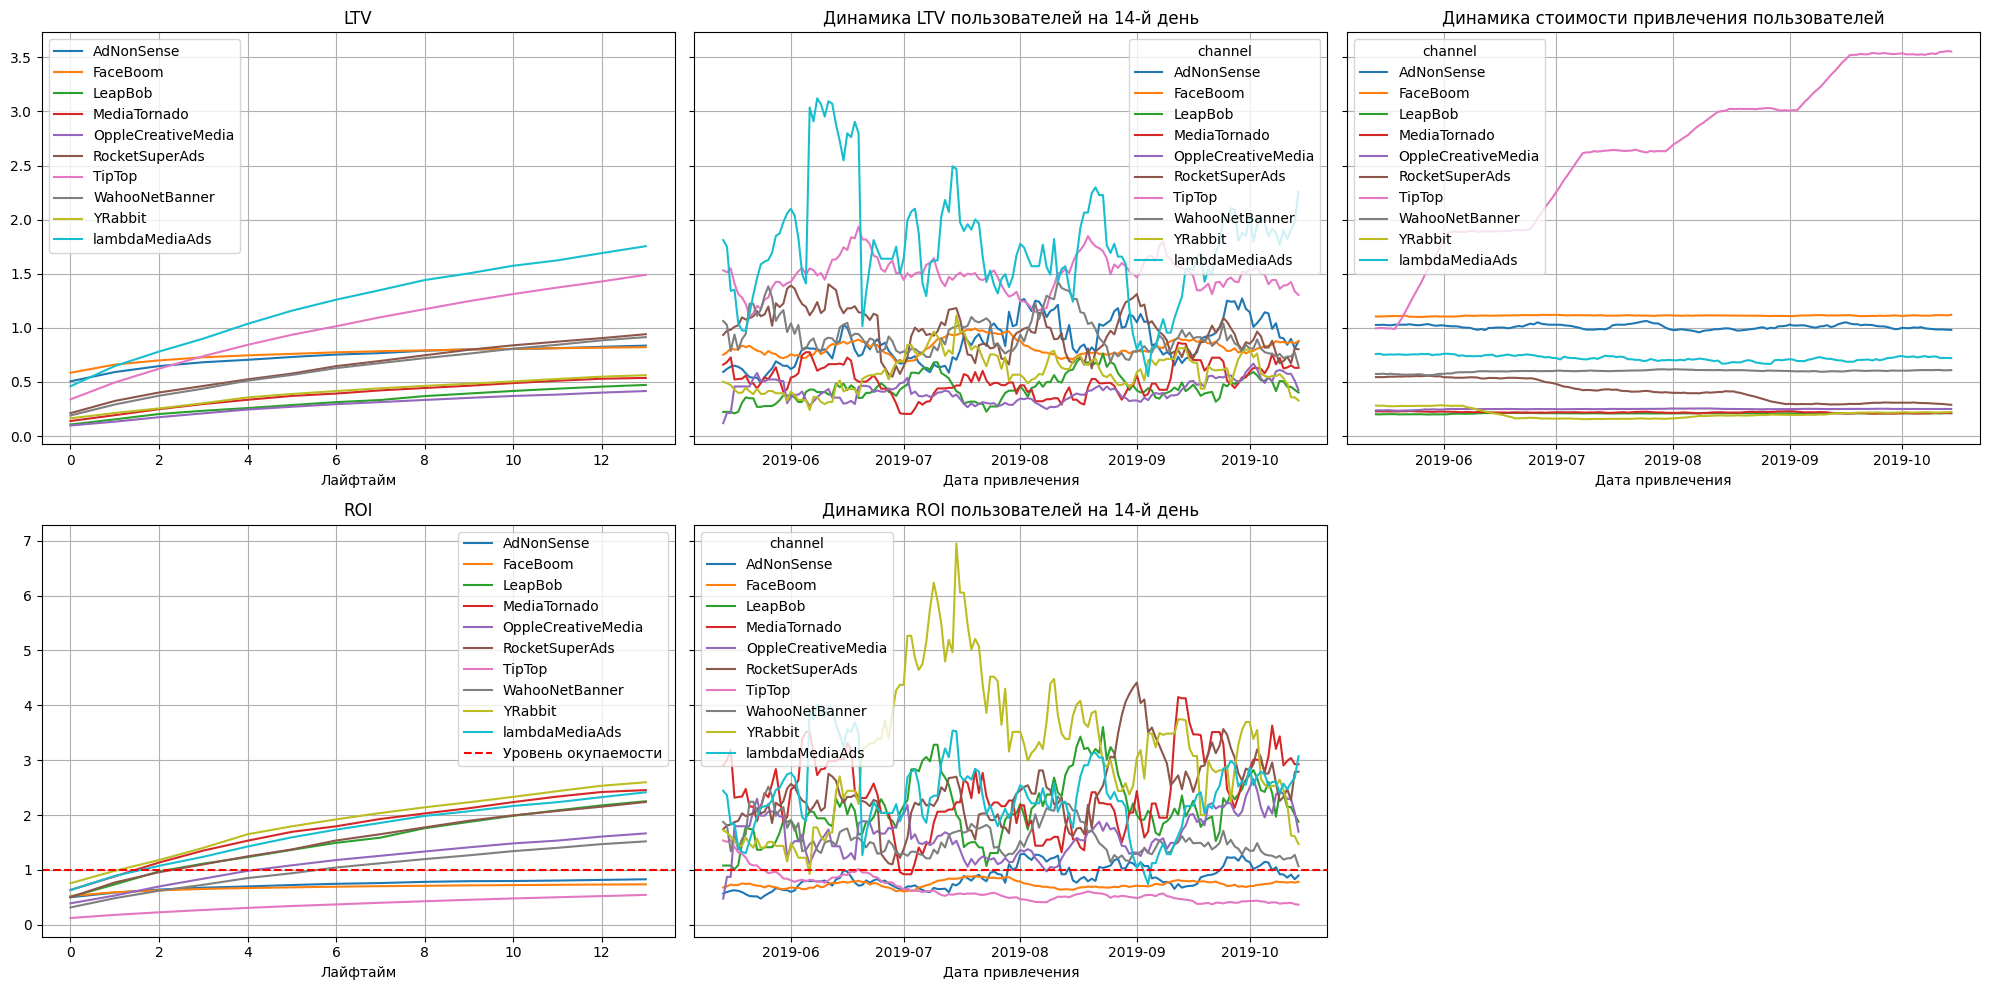

In [52]:
# окупаемость с разбивкой по источникам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

In [53]:
#Выведим показатель САС по каналам для более наглядного анализа
cac_channel

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Интересная информация на полученных графиках. Затраты на первые три компании, TipTop, FaceBoom и AdNonSense на которые тратится почти весь рекламный бюджет, не окупаются. По динамике стоимости привлечения видим, что траты на канал TipTop постоянно увеличивались. Можно выделить канал LambdaMediaAds как перспективный. При стоимости привлечения клиента в 0.72, он показывает хороршие показатели LTV. Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высоким.

Посмотрим, в каких регионах представленны те или иные каналы.

In [54]:
(
     profiles
     .pivot_table(index='channel',
                  columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .sort_values(by=('user_id', 'United States'), 
                  ascending=False)
 ).div(
     profiles
     .pivot_table(columns='region',
                  aggfunc={'user_id': 'count'}
                 )
     .values
 ).fillna(0).style.format('{:.2%}')

Полученная таблица подкрепляет информацию из графиков об окупаемости рекламы с разбивкой по странам. Теперь понятно, почему у США низкие показатели ROI, - два крупных неокупаемых канала работают по этой стране. Каналы, ориентированные на европейскую аудиторию, имеют одинаковое представительство как во Франции, так и в Великобритании с Германией. Если потребуется замена, этот факт можно учесть.

# Выводы по проделанной работе и рекомендации для отдела маркетинга

Компания-заказчик активна на рынке Европы (Германия, Франция и Великобритания) и в США. Несмотря на большие затраты на рекламу, компания испытывает убытки в последние несколько месяцев.<br> <br> Для изучения проблемы были проанализированы данные о пользовательской активности (лог сервера), покупках и рекламных затратах с 1 мая по 27 октября 2019 года.<br> <br> В результате исследования выяснилось, что основными причинами финансовых проблем являются высокие затраты на привлечение пользователей через рекламные каналы FaceBoom, TipTop в США и AdNonSense в Европе(топ 3 по САС):
<div>
<br>    

* Стоимость привлечения через эти каналы слишком высока, и не окупается за две недели;
<br> 
* Платящие пользователи FaceBoom и AdNonSence плохо удерживаются;

    <br>
* Расходы на привлечение через TipTop за полгода выросли почти в три раза.      
    
</div>





Чтобы исправить ситуацию, для отдела маркетинга предлагаются следующие рекомендации:
<div>
<br>    

* В связи с тем, что большинство пользователей приложения находятся в США, необходимо улучшить взаимоотношения с рекламными площадками этой страны. Как вариант, можно отказаться от использования FaceBoom и перенаправить средства в другие каналы рекламы.
<br> 
* Необходимо выявить причину увеличения стоимости привлечения пользователя в канале TipTop и по возможности решить эту проблему. Если это не удастся, то можно отказаться от использования этой рекламной площадки в пользу других. 
<br>    
* Для увеличения окупаемости, необходимо обратить внимание на владельцев устройств Mac и iPhone, поскольку стоимость привлечения таких пользователей высока и продолжает расти из месяца в месяц, а окупаемоcть страдает. Возможно, следует предложить маркетинговые идеи специально для владельцев устройств на базе этих операционных систем, чтобы повысить их денежную ценность для продукта.
<br> 
* Следует обратить внимание на европейский рынок, увеличив расходы на рекламу в lambdaMediaAds и снизив в AdNonSense.

    <br>
* На рынке США перспективным каналом может RocketSuperAds (низкий САС, неплохое привлечение и удержание, конверсия на уровне).

    <br>    
* Необходимо уделить внимание органическим пользователям приложения, поскольку они составляют значительную часть его дохода.   
    
</div>